In [1]:
import numpy as np
import pandas as pd
import time

In [2]:
df = pd.read_csv('Admission_Predict_Ver1.1.csv')

In [3]:
X=df.drop(columns=['Chance of Admit '])
y=df['Chance of Admit ']

In [26]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)

In [27]:
X_scaled.shape

(500, 8)

In [23]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [32]:
model = Sequential()

model.add(Dense(10,activation='relu',input_dim=8))
model.add(Dense(10,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [33]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 10)                90        
                                                                 
 dense_13 (Dense)            (None, 10)                110       
                                                                 
 dense_14 (Dense)            (None, 1)                 11        
                                                                 
Total params: 211 (844.00 Byte)
Trainable params: 211 (844.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


# Stochastic Gradient Descent

In [36]:
model.compile(loss='binary_crossentropy',metrics=['accuracy'])
start = time.time()
history = model.fit(X_scaled,y,epochs=10,batch_size=1,validation_split=0.2)
print(time.time() - start)

Epoch 1/10
400/400 [==============================] - 1s 1ms/step - loss: 0.5413 - accuracy: 0.0000e+00 - val_loss: 0.5708 - val_accuracy: 0.0000e+00
Epoch 2/10
400/400 [==============================] - 0s 912us/step - loss: 0.5415 - accuracy: 0.0000e+00 - val_loss: 0.5721 - val_accuracy: 0.0000e+00
Epoch 3/10
400/400 [==============================] - 0s 929us/step - loss: 0.5417 - accuracy: 0.0000e+00 - val_loss: 0.5714 - val_accuracy: 0.0000e+00
Epoch 4/10
400/400 [==============================] - 0s 908us/step - loss: 0.5416 - accuracy: 0.0000e+00 - val_loss: 0.5716 - val_accuracy: 0.0000e+00
Epoch 5/10
400/400 [==============================] - 0s 902us/step - loss: 0.5414 - accuracy: 0.0000e+00 - val_loss: 0.5719 - val_accuracy: 0.0000e+00
Epoch 6/10
400/400 [==============================] - 0s 898us/step - loss: 0.5416 - accuracy: 0.0000e+00 - val_loss: 0.5761 - val_accuracy: 0.0000e+00
Epoch 7/10
400/400 [==============================] - 0s 896us/step - loss: 0.5417 - accur

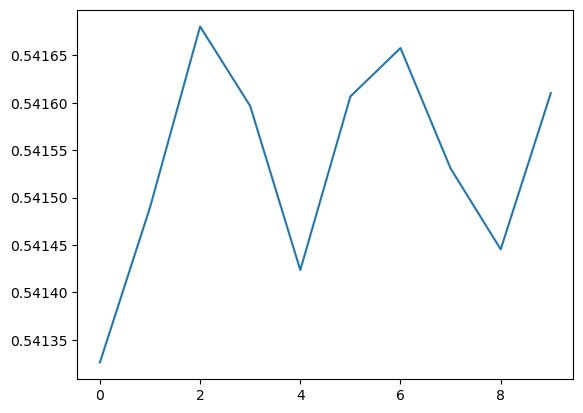

In [37]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])

In [38]:
model = Sequential()

model.add(Dense(10,activation='relu',input_dim=8))
model.add(Dense(10,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [39]:
model.compile(loss='binary_crossentropy',metrics=['accuracy'])
start = time.time()
history = model.fit(X_scaled,y,epochs=10,batch_size=500,validation_split=0.2)
print(time.time() - start)

Epoch 1/10
1/1 [==============================] - 0s 452ms/step - loss: 0.8775 - accuracy: 0.0000e+00 - val_loss: 0.8901 - val_accuracy: 0.0000e+00
Epoch 2/10
1/1 [==============================] - 0s 21ms/step - loss: 0.8575 - accuracy: 0.0000e+00 - val_loss: 0.8759 - val_accuracy: 0.0000e+00
Epoch 3/10
1/1 [==============================] - 0s 23ms/step - loss: 0.8442 - accuracy: 0.0000e+00 - val_loss: 0.8646 - val_accuracy: 0.0000e+00
Epoch 4/10
1/1 [==============================] - 0s 21ms/step - loss: 0.8336 - accuracy: 0.0000e+00 - val_loss: 0.8551 - val_accuracy: 0.0000e+00
Epoch 5/10
1/1 [==============================] - 0s 23ms/step - loss: 0.8247 - accuracy: 0.0000e+00 - val_loss: 0.8466 - val_accuracy: 0.0000e+00
Epoch 6/10
1/1 [==============================] - 0s 21ms/step - loss: 0.8169 - accuracy: 0.0000e+00 - val_loss: 0.8391 - val_accuracy: 0.0000e+00
Epoch 7/10
1/1 [==============================] - 0s 23ms/step - loss: 0.8098 - accuracy: 0.0000e+00 - val_loss: 0.83

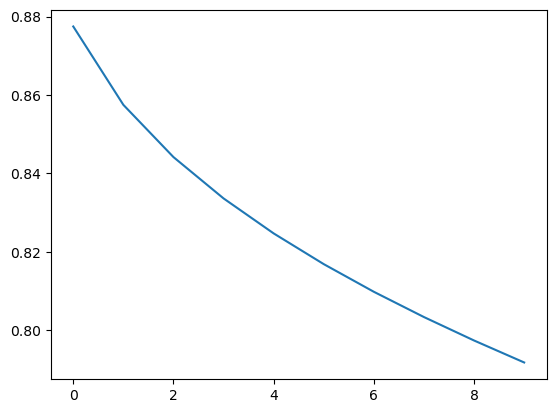

In [40]:
plt.plot(history.history['loss'])

here we can see that in stochastic gd we have to give batch size as 1 and in this in every epoch it will change parameters each time separately

for batch gd we have to give batch size as number of rows of data which indicates that we want to train each parameter collectively in one batch

batch gd uses dot product in place of loops which take less time but more memory

we can take mini batch gd in which we take multiple of 2 as batch size which is combination of both and we take multiple of 2 so to make efficient use of ram

also in batch gd it reaches gradually to lower loss but in stochastic gd it is very frequently changing in nature as seen in graph